In [1]:
from unityagents import UnityEnvironment
import numpy as np
from model import *
from collections import deque
from tqdm import tqdm

In [2]:
# please do not modify the line below
env = UnityEnvironment(file_name="./Banana", no_graphics=True)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
num_episodes = 2000
scores_window = deque(maxlen=100)
avg_scores = []
best_scores = 3
agent = Agent(state_size=37, action_size=4, seed=2020)
epsilon = 1.0
with tqdm(total=num_episodes) as pbar:
    for i_episode in range(num_episodes):
        pbar.update(1)
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        while True:
            action = agent.act(state, eps=epsilon)       # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # using agent interact with the environment
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        epsilon = max(epsilon * 0.995, 0.001)
        scores_window.append(score)
        if i_episode % 100 == 0:
            avg_scores.append(np.mean(scores_window))
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            if avg_scores[-1] > best_scores:
                best_scores = avg_scores[-1]
                torch.save({'qnetwork_local': agent.qnetwork_local.state_dict(),
                           'qnetwork_target': agent.qnetwork_target.state_dict()}, 'DDQN.ckpt')
                print('Save model successful.')

env.close()

  0%|          | 2/2000 [00:02<38:55,  1.17s/it]

Episode 0	Average Score: -1.00


  5%|▌         | 102/2000 [03:32<1:06:45,  2.11s/it]

Episode 100	Average Score: 1.25


 10%|█         | 202/2000 [07:08<1:05:46,  2.19s/it]

Episode 200	Average Score: 5.89
Save model successful.


 15%|█▌        | 302/2000 [10:43<59:17,  2.10s/it]  

Episode 300	Average Score: 9.34
Save model successful.


 20%|██        | 402/2000 [14:12<55:58,  2.10s/it]

Episode 400	Average Score: 11.13
Save model successful.


 25%|██▌       | 502/2000 [17:43<52:36,  2.11s/it]

Episode 500	Average Score: 12.45
Save model successful.


 30%|███       | 602/2000 [21:13<49:07,  2.11s/it]

Episode 600	Average Score: 12.58
Save model successful.


 35%|███▌      | 702/2000 [24:46<45:18,  2.09s/it]

Episode 700	Average Score: 13.92
Save model successful.


 40%|████      | 802/2000 [28:15<41:37,  2.09s/it]

Episode 800	Average Score: 13.61


 45%|████▌     | 902/2000 [31:46<38:37,  2.11s/it]

Episode 900	Average Score: 14.57
Save model successful.


 50%|█████     | 1002/2000 [35:16<35:06,  2.11s/it]

Episode 1000	Average Score: 14.76
Save model successful.


 55%|█████▌    | 1102/2000 [38:47<31:34,  2.11s/it]

Episode 1100	Average Score: 13.00


 60%|██████    | 1202/2000 [42:18<28:05,  2.11s/it]

Episode 1200	Average Score: 14.40


 65%|██████▌   | 1302/2000 [45:49<24:32,  2.11s/it]

Episode 1300	Average Score: 14.71


 70%|███████   | 1402/2000 [49:24<21:54,  2.20s/it]

Episode 1400	Average Score: 15.09
Save model successful.


 75%|███████▌  | 1502/2000 [53:03<17:35,  2.12s/it]

Episode 1500	Average Score: 15.50
Save model successful.


 80%|████████  | 1602/2000 [56:33<13:58,  2.11s/it]

Episode 1600	Average Score: 14.63


 85%|████████▌ | 1702/2000 [1:00:04<10:26,  2.10s/it]

Episode 1700	Average Score: 14.92


 90%|█████████ | 1802/2000 [1:03:34<06:56,  2.11s/it]

Episode 1800	Average Score: 15.38


 95%|█████████▌| 1902/2000 [1:07:04<03:26,  2.11s/it]

Episode 1900	Average Score: 14.84


100%|██████████| 2000/2000 [1:10:32<00:00,  2.12s/it]


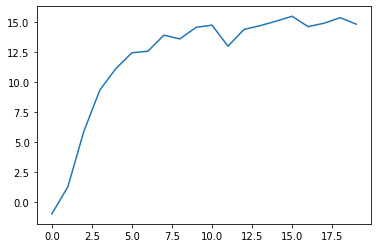

In [4]:
import matplotlib.pyplot as plt
plt.plot(avg_scores)
plt.show()